In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
data=pd.read_csv('car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

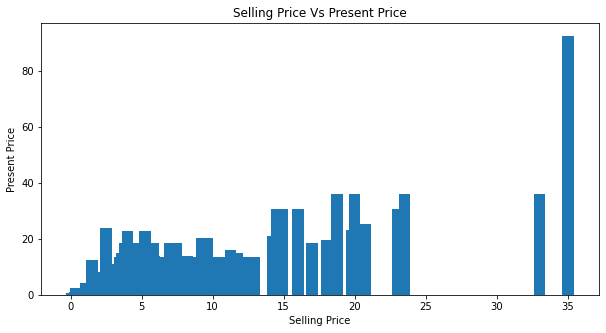

In [10]:
plt.figure(figsize=(10,5))
x='Selling_Price'
y='Present_Price'
plt.bar(x,y,data=data)
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.title("Selling Price Vs Present Price")
plt.show()

c:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

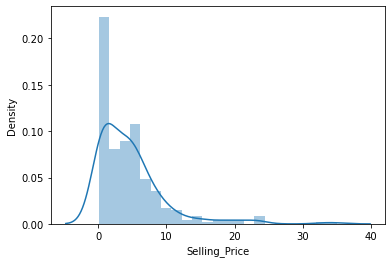

In [12]:
sns.distplot(data['Selling_Price'])

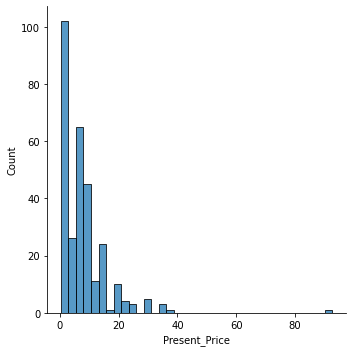

In [13]:
sns.displot(data['Present_Price'])

<AxesSubplot:xlabel='Present_Price', ylabel='Count'>

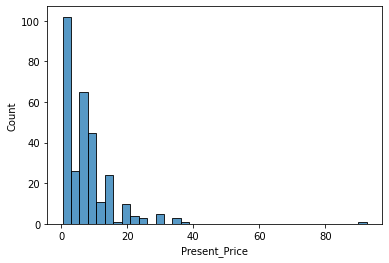

In [14]:
sns.histplot(data['Present_Price'])

In [15]:
label=LabelEncoder()

In [16]:
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Seller_Type']=label.fit_transform(data['Seller_Type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [18]:
data.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


<AxesSubplot:>

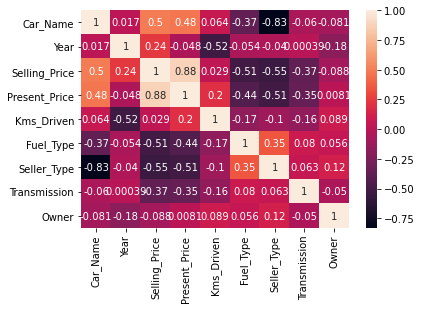

In [19]:
sns.heatmap(data.corr(),annot=True)

In [22]:
x=data[['Present_Price']]
y=data[['Selling_Price']]

In [23]:
print(x)

     Present_Price
0             5.59
1             9.54
2             9.85
3             4.15
4             6.87
..             ...
296          11.60
297           5.90
298          11.00
299          12.50
300           5.90

[301 rows x 1 columns]


In [24]:
print(y)

     Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x.shape,x_train.shape,x_test.shape

((301, 1), (240, 1), (61, 1))

In [26]:
model=LinearRegression()

In [27]:
model.fit(x_train,y_train)

LinearRegression()

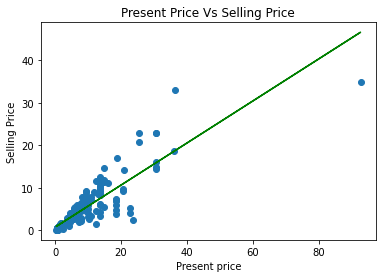

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='green')
plt.xlabel('Present price')
plt.ylabel('Selling Price')
plt.title('Present Price Vs Selling Price')
plt.show()

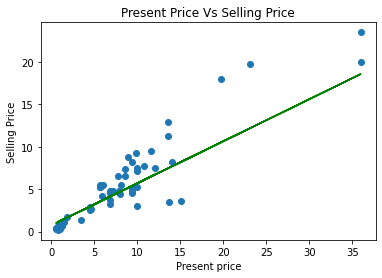

In [29]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='green')
plt.xlabel('Present price')
plt.ylabel('Selling Price')
plt.title('Present Price Vs Selling Price')
plt.show()

In [30]:
print('Accuracy on training Data',model.score(x_train,y_train))

Accuracy on training Data 0.7641953850242089


In [31]:
print('Accuracy on testing Data',model.score(x_test,y_test))

Accuracy on testing Data 0.7925288537728552


In [35]:
model.predict([[5.59]])

array([[3.51694101]])

In [36]:
model.predict([[9.85]])

array([[5.62652067]])